# सम्भाव्यता र तथ्यांकको परिचय  
यस नोटबुकमा, हामी पहिले चर्चा गरिएका केही अवधारणाहरूसँग खेल्नेछौं। सम्भाव्यता र तथ्यांकका धेरै अवधारणाहरू `numpy` र `pandas` जस्ता पाइथनका प्रमुख डाटा प्रशोधन पुस्तकालयहरूमा राम्रोसँग प्रतिनिधित्व गरिएका छन्।


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## र्‍यान्डम भेरिएबलहरू र वितरणहरू  
हामी ० देखि ९ सम्मको युनिफर्म वितरणबाट ३० मानहरूको नमूना निकालेर सुरु गरौं। साथै, हामी औसत र भिन्नता पनि गणना गर्नेछौं।  


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


नमुनामा कति विभिन्न मानहरू छन् भनेर दृष्टिगत रूपमा अनुमान गर्न, हामी **हिस्टोग्राम** प्लट गर्न सक्छौं:


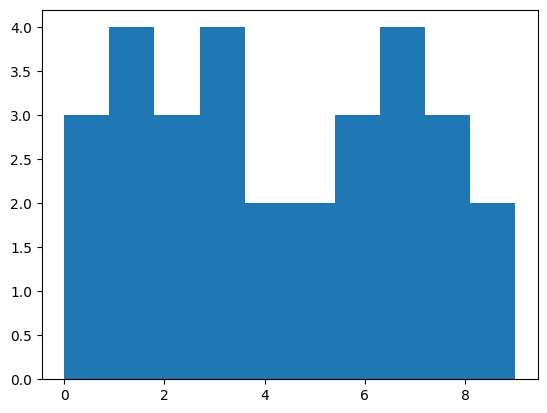

In [119]:
plt.hist(sample)
plt.show()

## वास्तविक डाटाको विश्लेषण

औसत (Mean) र भिन्नता (Variance) वास्तविक संसारको डाटाको विश्लेषण गर्दा धेरै महत्त्वपूर्ण हुन्छन्। अब, बेसबल खेलाडीहरूको डाटा [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights) बाट लोड गरौं।


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


हामी यहाँ डेटा विश्लेषणका लागि [**Pandas**](https://pandas.pydata.org/) नामक प्याकेज प्रयोग गर्दैछौं। यस कोर्समा पछि हामी Pandas र Python मा डेटा संग काम गर्ने बारेमा थप कुरा गर्नेछौं।

आउनुहोस्, उमेर, उचाइ र तौलको औसत मानहरू गणना गरौं:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

अब उचाइमा ध्यान केन्द्रित गरौं, र मानक विचलन र विचरण गणना गरौं:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


औसतको अतिरिक्त, मध्य मान र चतुर्थांशहरू हेर्नु उपयुक्त हुन्छ। तिनीहरूलाई **बक्स प्लट** प्रयोग गरेर दृश्यात्मक बनाउन सकिन्छ:


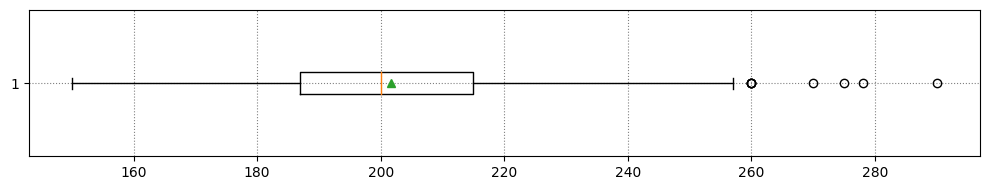

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

हामी हाम्रो डाटासेटका उपसमूहहरूको बक्स प्लटहरू पनि बनाउन सक्छौं, उदाहरणका लागि, खेलाडीको भूमिकाद्वारा समूहबद्ध।


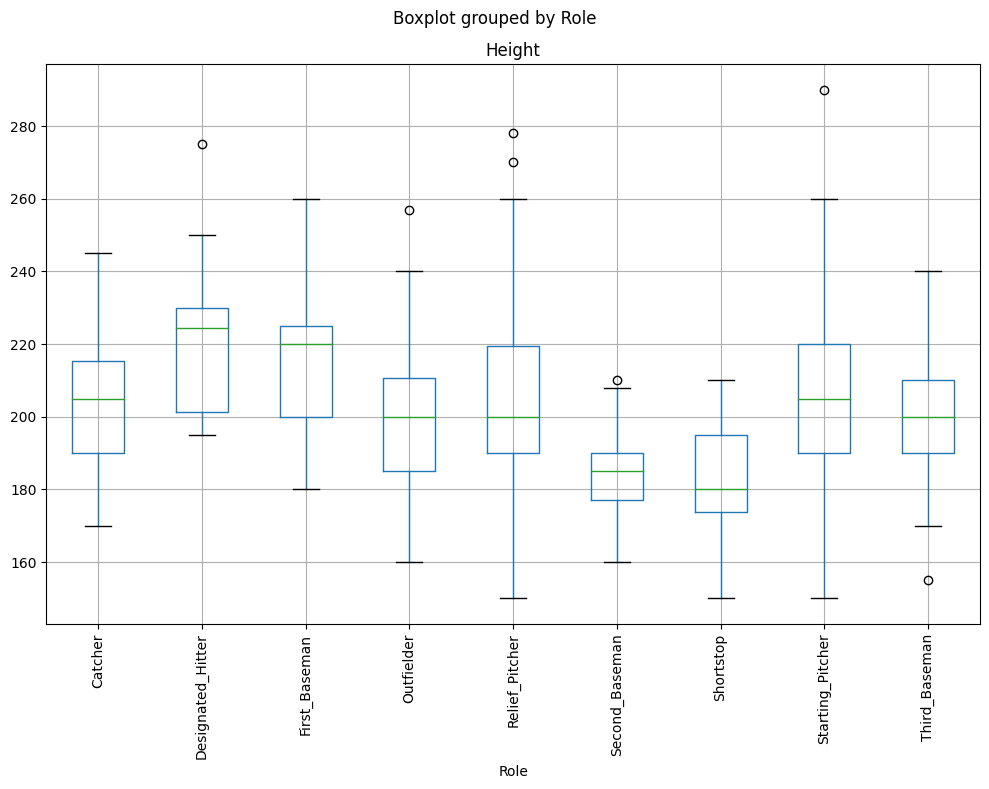

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **नोट**: यो चित्रले सुझाव दिन्छ कि औसतमा, पहिलो बेसम्यानहरूको उचाइ दोस्रो बेसम्यानहरूको उचाइभन्दा बढी छ। पछि हामी सिक्नेछौं कि कसरी यो परिकल्पनालाई औपचारिक रूपमा परीक्षण गर्न सकिन्छ, र कसरी हाम्रो डाटालाई सांख्यिकीय रूपमा महत्त्वपूर्ण देखाउन सकिन्छ।  

उमेर, उचाइ र तौल सबै निरन्तर र्‍यान्डम भेरिएबलहरू हुन्। तपाईंलाई के लाग्छ, तिनीहरूको वितरण कस्तो छ? पत्ता लगाउने राम्रो तरिका भनेको मानहरूको हिस्टोग्राम बनाउनु हो:


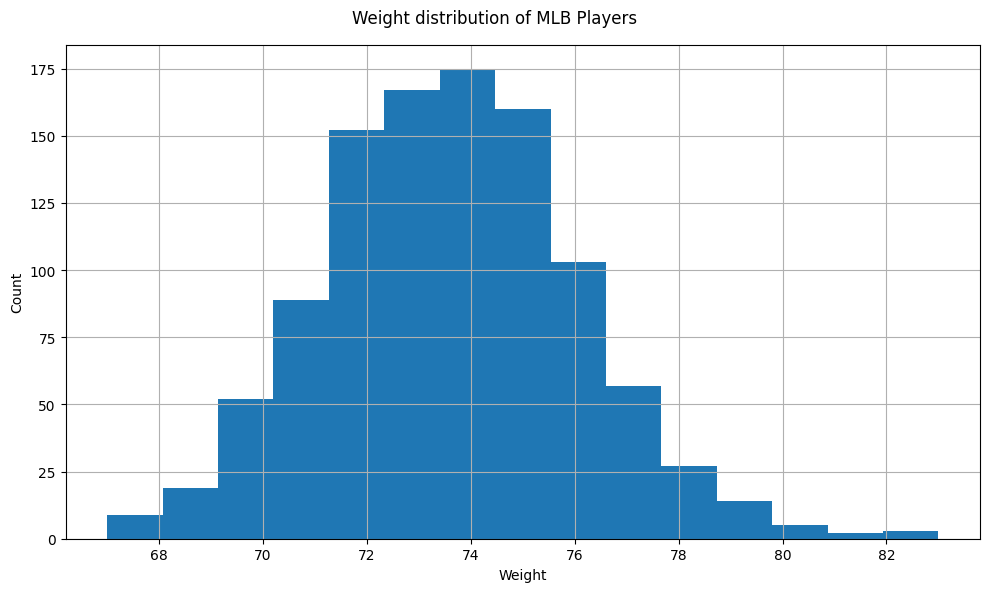

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## सामान्य वितरण

हामी तौलहरूको कृत्रिम नमूना बनाउँछौं जसले हाम्रो वास्तविक डाटाको समान औसत र भिन्नता भएको सामान्य वितरणलाई अनुसरण गर्छ:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

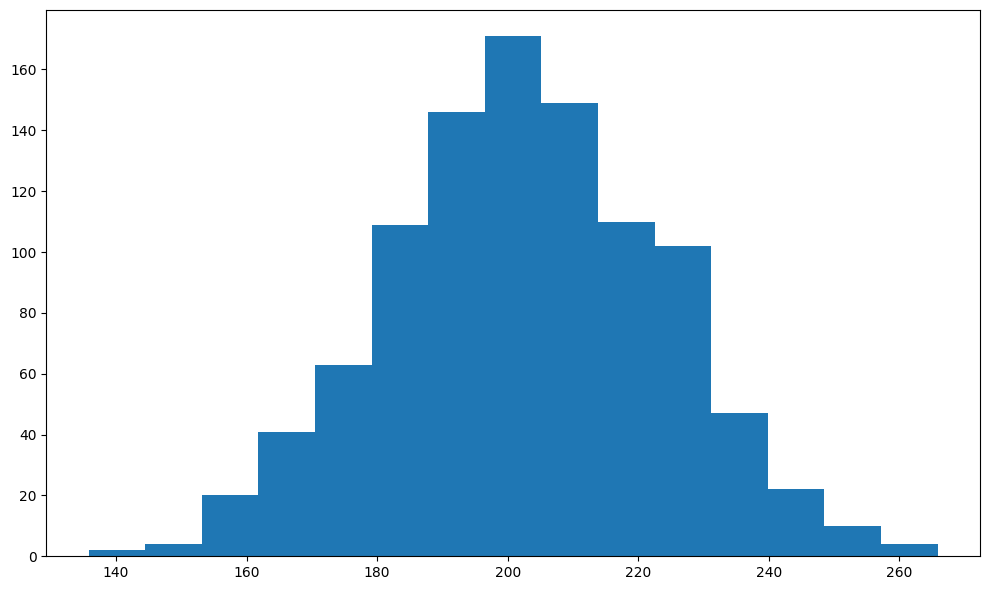

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

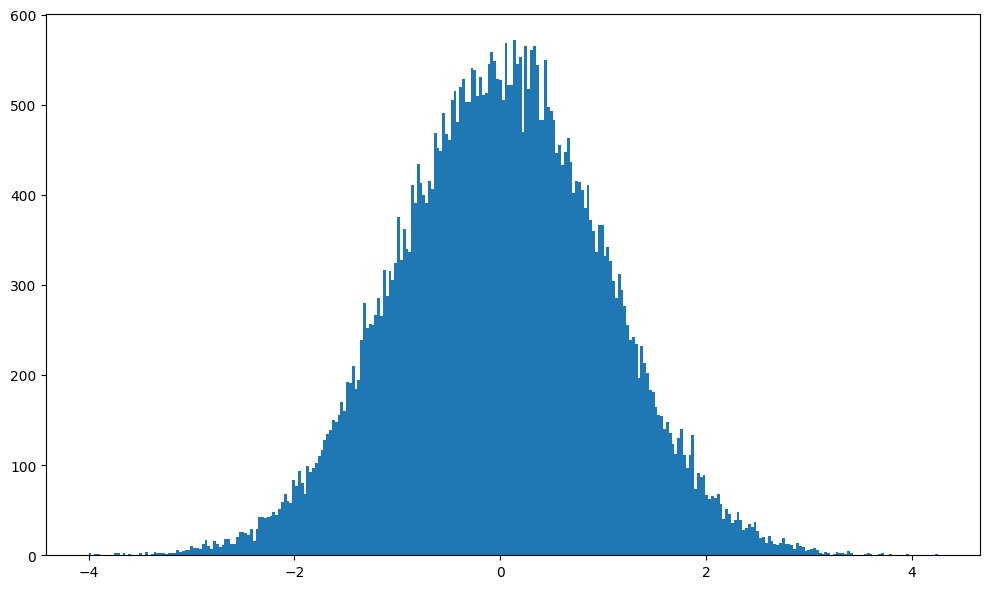

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

वास्तविक जीवनका अधिकांश मानहरू सामान्य रूपमा वितरण गरिएका हुन्छन्, त्यसैले नमूना डाटा उत्पन्न गर्नको लागि हामीले समान रूपमा वितरण गरिएको र्यान्डम नम्बर जेनेरेटर प्रयोग गर्नु हुँदैन। यदि हामीले समान वितरण (जसलाई `np.random.rand` द्वारा उत्पन्न गरिन्छ) प्रयोग गरेर तौलहरू उत्पन्न गर्न प्रयास गर्यौं भने यस्तो हुन्छ:


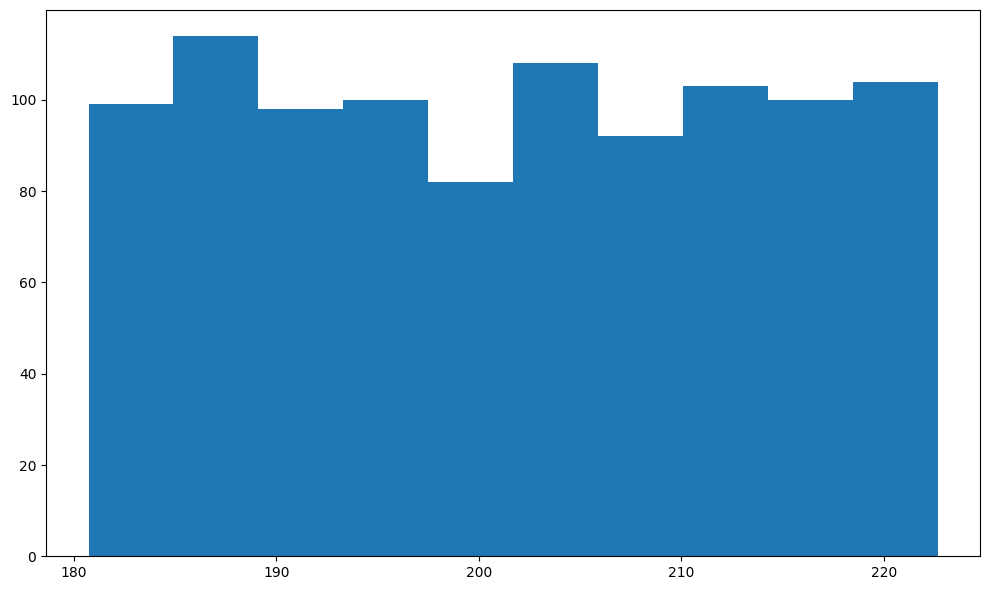

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## विश्वास अन्तरालहरू

अब हामी बेसबल खेलाडीहरूको तौल र उचाइका लागि विश्वास अन्तरालहरू गणना गर्नेछौं। हामी यो कोड प्रयोग गर्नेछौं [यो StackOverflow छलफलबाट](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## परिकल्पना परीक्षण

हामी हाम्रो बेसबल खेलाडीहरूको डेटासेटमा विभिन्न भूमिकाहरू अन्वेषण गरौं:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


हामी देख्न सक्छौं कि अन्तरालहरू एक-अर्कासँग ओभरलैप गर्दैनन्।

परिकल्पनालाई प्रमाणित गर्नको लागि सांख्यिकीय रूपमा अझ सही तरिका भनेको **Student t-test** प्रयोग गर्नु हो:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


`ttest_ind` फङ्क्सनले फर्काउने दुई मानहरू हुन्:  
* p-value लाई दुई वितरणहरूको औसत समान हुने सम्भावना भनेर मान्न सकिन्छ। हाम्रो अवस्थामा, यो धेरै कम छ, जसको अर्थ पहिलो बेसम्यानहरू अग्लो हुने बलियो प्रमाण छ।  
* t-value भनेको t-test मा प्रयोग गरिने सामान्यीकृत औसत भिन्नताको मध्यवर्ती मान हो, र यो दिइएको विश्वासस्तरको लागि थ्रेसहोल्ड मानसँग तुलना गरिन्छ।  


## केन्द्रीय सिमाको प्रमेयको प्रयोग गरेर सामान्य वितरणको अनुकरण

Python मा रहेको pseudo-random जनरेटरले हामीलाई समान वितरण प्रदान गर्न डिजाइन गरिएको छ। यदि हामी सामान्य वितरणको लागि जनरेटर बनाउन चाहन्छौं भने, हामी केन्द्रीय सिमाको प्रमेय प्रयोग गर्न सक्छौं। सामान्य वितरण भएको मान प्राप्त गर्नका लागि, हामी समान-जनित नमूनाको औसत गणना गर्नेछौं।


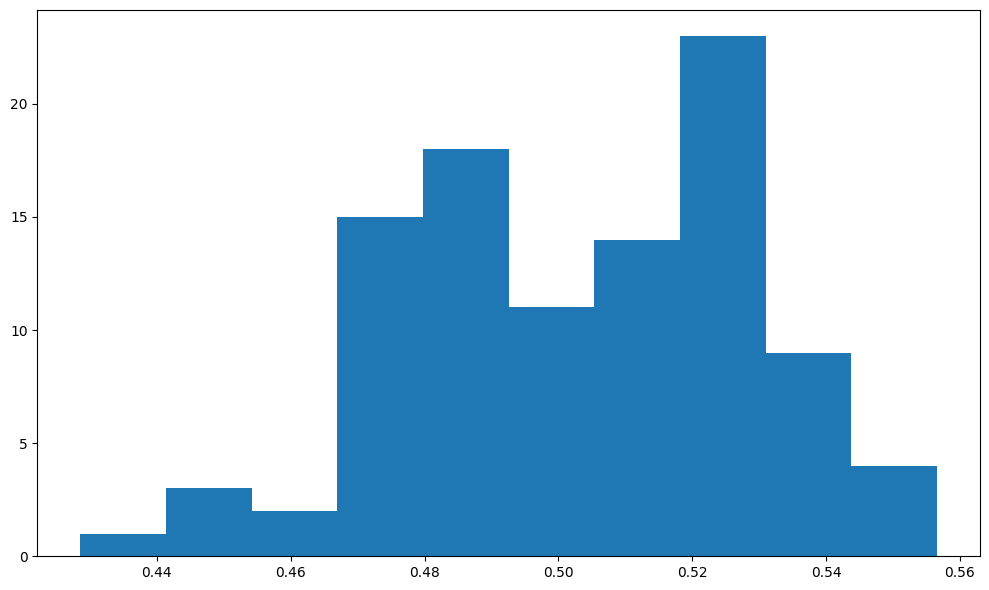

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## सम्बन्ध र दुष्ट बेसबल कम्पनी

सम्बन्धले हामीलाई डाटा अनुक्रमहरू बीचको सम्बन्ध पत्ता लगाउन मद्दत गर्दछ। हाम्रो सानो उदाहरणमा, कल्पना गरौं कि एउटा दुष्ट बेसबल कम्पनी छ जसले आफ्ना खेलाडीहरूलाई उनीहरूको उचाइको आधारमा तलब दिन्छ - खेलाडी जति अग्लो हुन्छ, उति धेरै पैसा उसले पाउँछ। मानौं कि आधारभूत तलब $1000 छ, र उचाइको आधारमा $0 देखि $100 सम्मको अतिरिक्त बोनस। हामी MLB का वास्तविक खेलाडीहरू लिनेछौं, र उनीहरूको काल्पनिक तलब गणना गर्नेछौं:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


अब ती क्रमहरूको सहसंबन्ध र सम्बन्ध गणना गरौं। `np.cov` ले हामीलाई तथाकथित **सहसंबन्ध म्याट्रिक्स** दिनेछ, जुन बहुविध चरहरूमा सहसंबन्धको विस्तार हो। सहसंबन्ध म्याट्रिक्स $M$ को तत्त्व $M_{ij}$ इनपुट चरहरू $X_i$ र $X_j$ बीचको सम्बन्ध हो, र विकर्ण मानहरू $M_{ii}$ $X_{i}$ को विचलन हो। त्यसैगरी, `np.corrcoef` ले हामीलाई **सम्बन्ध म्याट्रिक्स** दिनेछ।


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


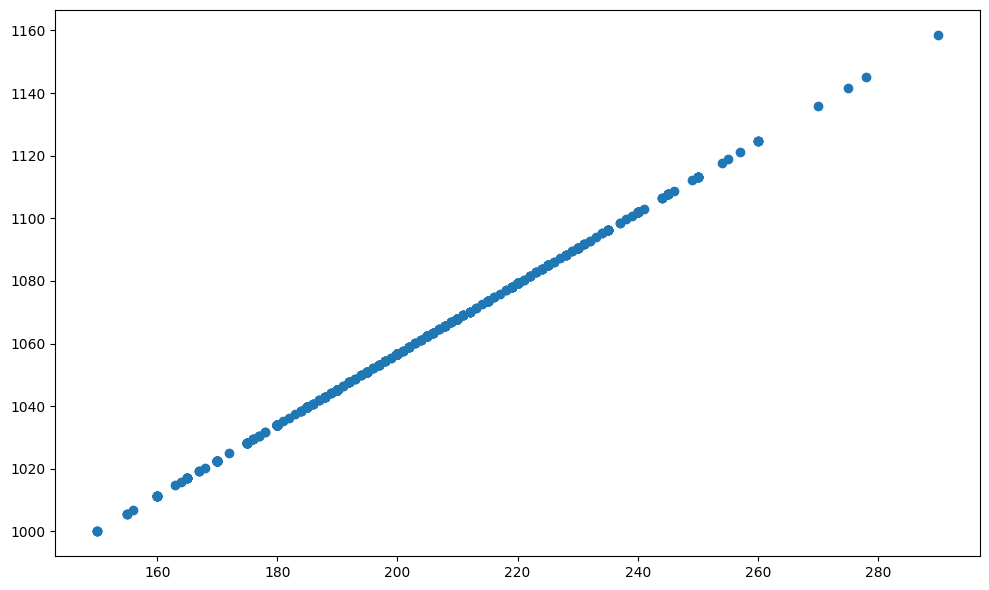

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


यस अवस्थामा, सम्बन्ध अलि सानो छ, तर यो अझै पनि धेरै उच्च छ। अब, सम्बन्धलाई अझ कम स्पष्ट बनाउनको लागि, हामी तलबमा केही अनियमित चर जोडेर केही अतिरिक्त अनियमितता थप्न चाहन सक्छौं। हेरौं के हुन्छ:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


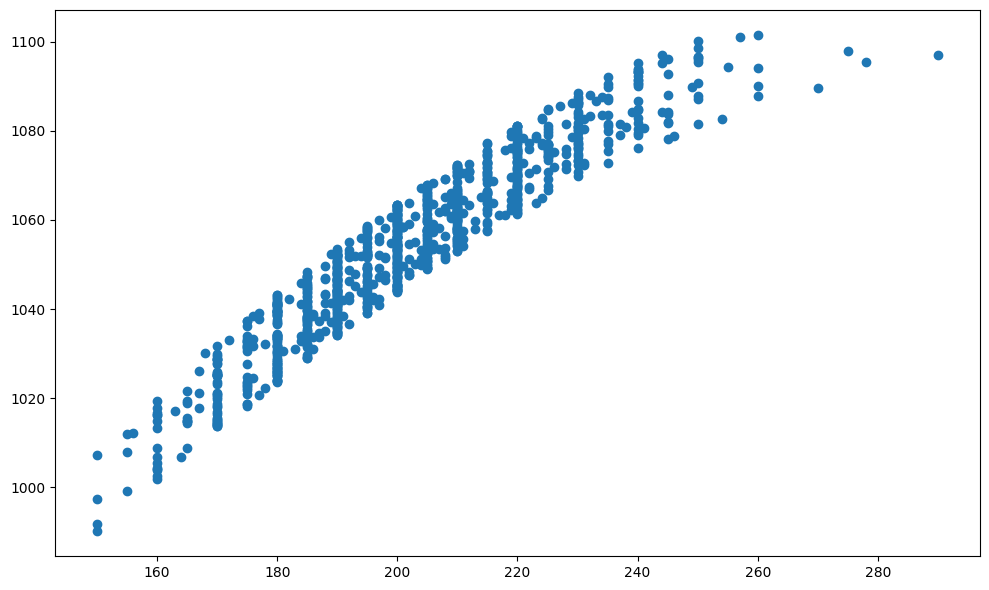

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

के तपाईं अनुमान गर्न सक्नुहुन्छ किन बिन्दुहरू यसरी ठाडो रेखाहरूमा मिल्छन्?

हामीले तलब जस्तो कृत्रिम रूपमा सिर्जना गरिएको अवधारणा र अवलोकन गरिएको चर *उचाइ* बीचको सम्बन्धलाई अवलोकन गरेका छौं। अब हेरौं कि दुई अवलोकन गरिएका चरहरू, जस्तै उचाइ र तौल, पनि आपसमा सम्बन्धित छन् कि छैनन्:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

दुर्भाग्यवश, हामीले कुनै परिणाम प्राप्त गर्न सकेनौं - केवल केही अजीब `nan` मानहरू। यसको कारण हाम्रो श्रृंखलाका केही मानहरू अपरिभाषित छन्, जसलाई `nan` द्वारा प्रतिनिधित्व गरिएको छ, जसले गर्दा अपरेशनको परिणाम पनि अपरिभाषित हुन्छ। म्याट्रिक्स हेर्दा हामी देख्न सक्छौं कि `Weight` समस्या भएको स्तम्भ हो, किनकि `Height` मानहरूको आत्म-सम्बन्ध गणना गरिएको छ।

> यो उदाहरणले **डाटा तयारी** र **सफाई** को महत्त्व देखाउँछ। उचित डाटा बिना हामी केही पनि गणना गर्न सक्दैनौं।

आउनुहोस्, `fillna` विधि प्रयोग गरेर हराएका मानहरू भर्ने र सम्बन्ध गणना गर्ने प्रयास गरौं:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

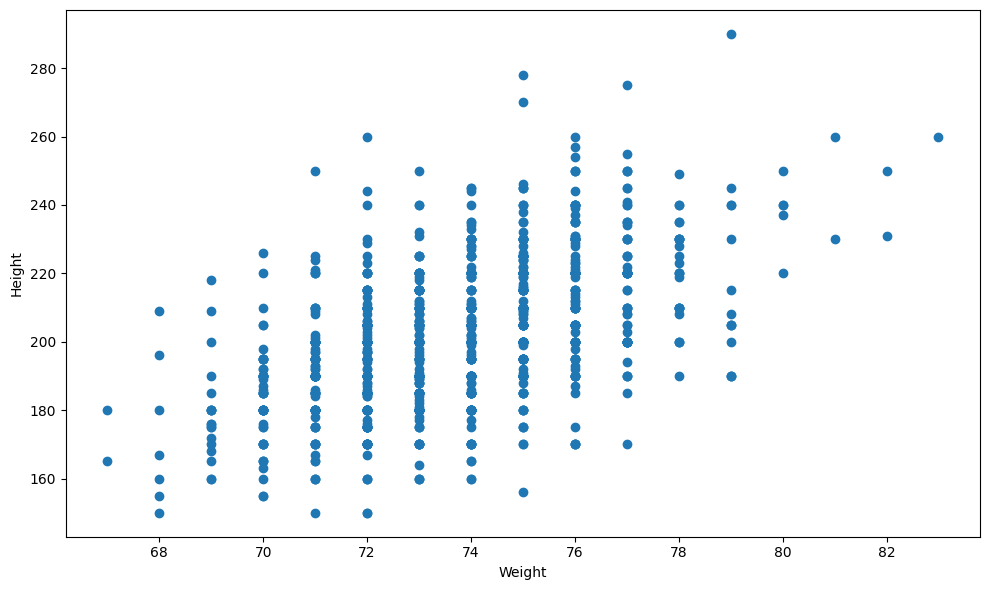

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## निष्कर्ष

यस नोटबुकमा, हामीले डाटामा आधारभूत कार्यहरू गरेर सांख्यिकीय कार्यहरू कसरी गणना गर्ने भन्ने कुरा सिक्यौं। अब हामीलाई थाहा छ कि केही परिकल्पनाहरू प्रमाणित गर्न गणित र सांख्यिकीको एक सुदृढ उपकरण कसरी प्रयोग गर्ने, र डाटा नमुनाको आधारमा कुनै पनि चरहरूको लागि विश्वास अन्तराल कसरी गणना गर्ने।



---

**अस्वीकरण**:  
यो दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) प्रयोग गरी अनुवाद गरिएको हो। हामी यथासम्भव शुद्धता सुनिश्चित गर्न प्रयास गर्छौं, तर कृपया ध्यान दिनुहोस् कि स्वचालित अनुवादमा त्रुटिहरू वा अशुद्धताहरू हुन सक्छन्। यसको मूल भाषामा रहेको मूल दस्तावेज़लाई आधिकारिक स्रोत मानिनुपर्छ। महत्वपूर्ण जानकारीका लागि, व्यावसायिक मानव अनुवाद सिफारिस गरिन्छ। यस अनुवादको प्रयोगबाट उत्पन्न हुने कुनै पनि गलतफहमी वा गलत व्याख्याका लागि हामी जिम्मेवार हुने छैनौं।
